Evaluate models on the GretelAI text classification task

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import re, os

In [ ]:
path = 'results/enron-5class'
for file in os.listdir(path):
  if not file.endswith('.csv'):# or 'Focus' not in file:
    continue  
  df = pd.read_csv(f'{path}/{file}')
  # Assuming the file has two columns: 'true_labels' and 'predicted_labels', lowercase the labels
  true_labels = df['true_label'].astype(str).apply(lambda x: x.lower())
  predicted_labels = df['predicted_label'].astype(str).apply(lambda x: x.lower())

  # Remove non-alphabetic characters except spaces from predicted labels
  predicted_labels = predicted_labels.apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
  true_labels = true_labels.apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

  correct = 0
  for tl, pl in zip(true_labels, predicted_labels):
    if tl in pl:
      correct += 1

  # Calculate metrics
  accuracy = accuracy_score(true_labels, predicted_labels)
  # precision = precision_score(true_labels, predicted_labels, average='weighted')  # Use 'macro', 'micro', or 'weighted' as appropriate
  # recall = recall_score(true_labels, predicted_labels, average='weighted')
  f1 = f1_score(true_labels, predicted_labels, average='weighted')

  # Display metrics
  print(file)
  print(f"Accuracy : {accuracy}, F1: {f1}, Correctly predicted: {correct}, {correct/len(df)}, Total: {len(df)} \n")# Precision (weighted) {precision}, Recall: {recall}, F1: {f1}")


DP_DD_Test-eps=1_enron_5class.csv
Accuracy : 0.6416666666666667, F1: 0.7663172829653278, Correctly predicted: 156, 0.65, Total: 240 

Distributed-DP-v2_enron_5class.csv
Accuracy : 0.8583333333333333, F1: 0.9012943340760867, Correctly predicted: 211, 0.8791666666666667, Total: 240 

enron-5class-5epoch_enron_5class.csv
Accuracy : 0.8333333333333334, F1: 0.8582773712153824, Correctly predicted: 200, 0.8333333333333334, Total: 240 

Distributed-DP-Poissonv4_enron_5class.csv
Accuracy : 0.6791666666666667, F1: 0.7687519124958132, Correctly predicted: 167, 0.6958333333333333, Total: 240 

Distributed-DP-Poissonv5_enron_5class.csv
Accuracy : 0.75, F1: 0.8355105861720418, Correctly predicted: 185, 0.7708333333333334, Total: 240 

enron-5class-10epoch_results.csv
Accuracy : 0.95, F1: 0.9720834992843866, Correctly predicted: 229, 0.9541666666666667, Total: 240 

meta-llama-Llama-3.2-1B_results.csv
Accuracy : 0.1125, F1: 0.19700362898697216, Correctly predicted: 28, 0.11666666666666667, Total: 24

In [ ]:
path = 'results/gretelai'
for file in os.listdir(path):
  if not file.endswith('.csv'):
    continue  
  df = pd.read_csv(f'{path}/{file}')
  
  true_labels = df['true_label'].astype(str).apply(lambda x: x.lower())
  predicted_labels = df['predicted_label'].astype(str).apply(lambda x: x.lower())

  # Remove non-alphabetic characters except spaces from predicted labels
  predicted_labels = predicted_labels.apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
  true_labels = true_labels.apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

  correct = 0
  for tl, pl in zip(true_labels, predicted_labels):
    if tl in pl:
      correct += 1

  # Calculate metrics
  accuracy = accuracy_score(true_labels, predicted_labels)
  f1 = f1_score(true_labels, predicted_labels, average='weighted')

  # Display metrics
  print(file)
  print(f"Accuracy : {accuracy}, F1: {f1}, Correctly predicted: {correct}, {correct/len(df)}, Total: {len(df)} \n")# Precision (weighted) {precision}, Recall: {recall}, F1: {f1}")


DPO_GretelAI-v4_results_test_0.csv
Accuracy : 0.7729591836734694, F1: 0.7946857921661243, Correctly predicted: 2485, 0.7924107142857143, Total: 3136 

undial-Undial-gretelai_complete_undial_unique_20percent_results_test_0.csv
Accuracy : 0.7554209183673469, F1: 0.7996809560221297, Correctly predicted: 2414, 0.7697704081632653, Total: 3136 

custom-ft-DP-Speed-Test-final_model_gretelai_synthetic_pii_finance_multilingual_curated.csv
Accuracy : 0.5994897959183674, F1: 0.6600232758799821, Correctly predicted: 1958, 0.6243622448979592, Total: 3136 

DP-v8_results_0.csv
Accuracy : 0.31728316326530615, F1: 0.42889003645627577, Correctly predicted: 1128, 0.3596938775510204, Total: 3136 

llama-3.2-1b-document-classifier-v5_enron_0.csv
Accuracy : 0.8488520408163265, F1: 0.86740739629689, Correctly predicted: 2724, 0.8686224489795918, Total: 3136 

models-llama-3.2-1b-document-classifier-v2-2_gretelai_synthetic_pii_finance_multilingual_curated.csv
Accuracy : 0.7908163265306123, F1: 0.807196275009

In [ ]:
from datasets import load_from_disk
datasets = load_from_disk('datasets/Enron/gretelai_with_enron_5classs')
print(set(datasets['test']['document_type']))

print(len(true_labels.unique()))

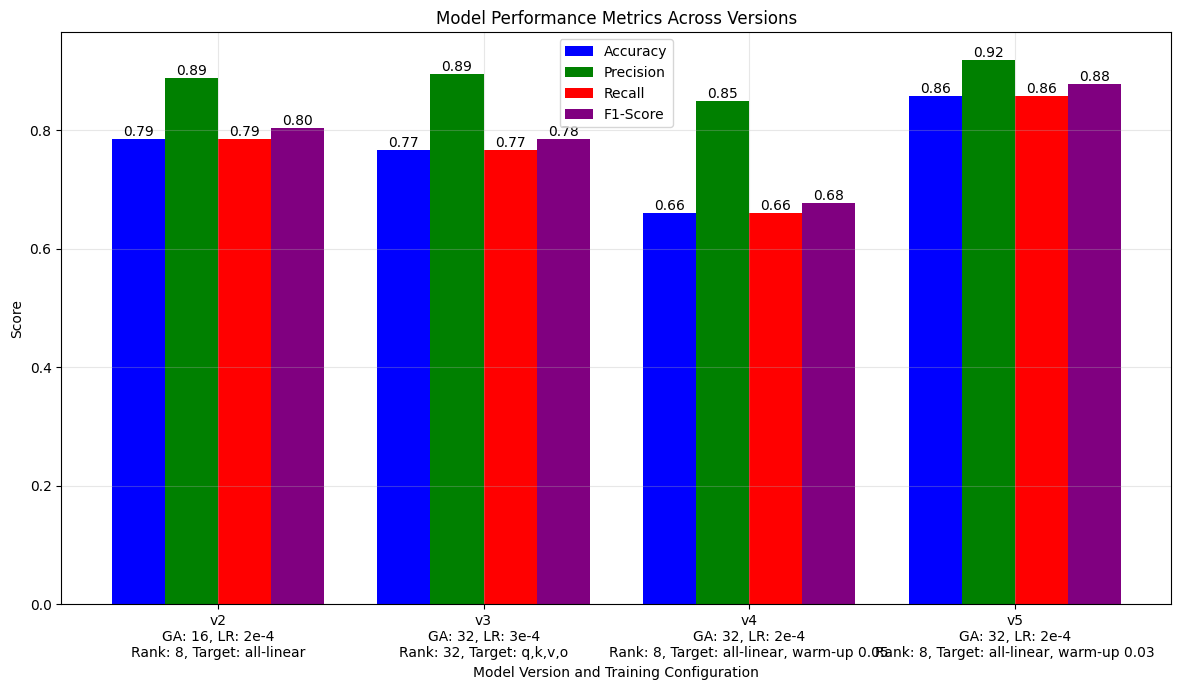

In [ ]:
import matplotlib.pyplot as plt

# Create lists to store metrics for each version
versions = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Training configuration details for each version
version_details = {
    2: "GA: 16, LR: 2e-4\nRank: 8, Target: all-linear",
    3: "GA: 32, LR: 3e-4\nRank: 32, Target: q,k,v,o",
    4: "GA: 32, LR: 2e-4\nRank: 8, Target: all-linear, warm-up 0.05",
    5: "GA: 32, LR: 2e-4\nRank: 8, Target: all-linear, warm-up 0.03"
}

# Collect metrics for each version
for i in [2,3,4,5]:
    df = pd.read_csv(f'FT-eval/classifier-v{i}.csv')
    
    true_labels = df['true_label'].astype(str).apply(lambda x: x.lower())
    predicted_labels = df['predicted_label'].astype(str).apply(lambda x: x.lower())

    # Clean labels
    predicted_labels = predicted_labels.apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
    true_labels = true_labels.apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

    # Calculate metrics
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    f1 = f1_score(true_labels, predicted_labels, average='weighted')
    
    versions.append(f'v{i}\n{version_details[i]}')
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Create the plot
plt.figure(figsize=(12, 7))
x = range(len(versions))
width = 0.2

plt.bar([i - width*1.5 for i in x], accuracies, width, label='Accuracy', color='blue')
plt.bar([i - width/2 for i in x], precisions, width, label='Precision', color='green')
plt.bar([i + width/2 for i in x], recalls, width, label='Recall', color='red')
plt.bar([i + width*1.5 for i in x], f1_scores, width, label='F1-Score', color='purple')

plt.xlabel('Model Version and Training Configuration')
plt.ylabel('Score')
plt.title('Model Performance Metrics Across Versions')
plt.xticks(x, versions)
plt.legend()
plt.grid(True, alpha=0.3)

# Add value labels on top of bars
for i in x:
    plt.text(i - width*1.5, accuracies[i], f'{accuracies[i]:.2f}', ha='center', va='bottom')
    plt.text(i - width/2, precisions[i], f'{precisions[i]:.2f}', ha='center', va='bottom')
    plt.text(i + width/2, recalls[i], f'{recalls[i]:.2f}', ha='center', va='bottom')
    plt.text(i + width*1.5, f1_scores[i], f'{f1_scores[i]:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [5]:
from sklearn.metrics import jaccard_score
from sklearn.preprocessing import MultiLabelBinarizer

# Tokenize labels into sets (e.g., words)
true_labels_sets = df['true_label'].astype(str).apply(lambda x: set(x.lower().split()))
predicted_labels_sets = df['predicted_label'].astype(str).apply(lambda x: set(x.lower().split()))

# Use MultiLabelBinarizer for multi-label data
mlb = MultiLabelBinarizer()
true_binarized = mlb.fit_transform(true_labels_sets)
pred_binarized = mlb.transform(predicted_labels_sets)

# Compute Jaccard similarity
jaccard = jaccard_score(true_binarized, pred_binarized, average='samples')
print("Jaccard Similarity:", jaccard)


Jaccard Similarity: 0.819922536916001


In [6]:
def relaxed_exact_match(true_label, predicted_label, threshold=0.5):
    # Convert to lowercase to handle case variations
    true_tokens = set(true_label.lower().split())
    predicted_tokens = set(predicted_label.lower().split())
    
    # Compute overlap
    intersection = true_tokens.intersection(predicted_tokens)
    
    # Calculate precision and recall of overlap
    precision = len(intersection) / len(predicted_tokens) if predicted_tokens else 0
    recall = len(intersection) / len(true_tokens) if true_tokens else 0
    
    # Harmonic mean (F1 score) of precision and recall
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return 1.0 if f1 >= threshold else 0.0


# Apply relaxed exact match to all rows
threshold = 0.5  # You can adjust this to be stricter or more lenient
df['relaxed_match'] = df.apply(
    lambda row: relaxed_exact_match(str(row['true_label']), str(row['predicted_label']), threshold),
    axis=1
)

# Compute relaxed accuracy (average relaxed exact match)
relaxed_accuracy = df['relaxed_match'].mean()
print("Relaxed Exact Match Accuracy (Threshold = {}): {:.4f}".format(threshold, relaxed_accuracy))


Relaxed Exact Match Accuracy (Threshold = 0.5): 0.8291


In [ ]:
df = pd.read_csv(f'results/pii-compass-attack/compass-unique-emails.csv')
print(len(df))
# Assuming the file has two columns: 'true_labels' and 'predicted_labels', lowercase the labels
true_labels = df['true_label'].astype(str).apply(lambda x: x.lower())
predicted_labels = df['predicted_label'].astype(str).apply(lambda x: x.lower())

# Remove non-alphabetic characters except spaces from predicted labels
predicted_labels = predicted_labels.apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
true_labels = true_labels.apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

# Calculate metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')  # Use 'macro', 'micro', or 'weighted' as appropriate
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

counts = 0
for row in df.itertuples():
    if str(row.true_label) in str(row.predicted_label):
        counts += 1

# Display metrics
print(true_labels.iloc[0], predicted_labels.iloc[0])
print(f"Accuracy :", accuracy)
print(f"Precision (weighted) :", precision)
print(f"Recall (weighted) :", recall)
print(f"F1-Score (weighted) :", f1)

print(counts / len(df))

512
michelleleefergusonorg michelleleeemailcommailtomichelle
Accuracy : 0.0
Precision (weighted) : 0.0
Recall (weighted) : 0.0
F1-Score (weighted) : 0.0
0.0


In [ ]:
for f in os.listdir('results/ICL Attack/'):
  if not f.endswith('.csv'):
    continue
  df = pd.read_csv(f'results/ICL Attack/{f}')
  print(len(df))
  # Assuming the file has two columns: 'true_labels' and 'predicted_labels', lowercase the labels
  true_labels = df['true_label'].astype(str).apply(lambda x: x.lower())
  predicted_labels = df['predicted_label'].astype(str).apply(lambda x: x.lower())

  # Remove non-alphabetic characters except spaces from predicted labels
  predicted_labels = predicted_labels.apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
  true_labels = true_labels.apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

  # Calculate metrics
  accuracy = accuracy_score(true_labels, predicted_labels)
  precision = precision_score(true_labels, predicted_labels, average='weighted')  # Use 'macro', 'micro', or 'weighted' as appropriate
  recall = recall_score(true_labels, predicted_labels, average='weighted')
  f1 = f1_score(true_labels, predicted_labels, average='weighted')

  counts = 0
  for row in df.itertuples():
      if str(row.true_label) in str(row.predicted_label):
          counts += 1

  # Display metrics
  print(f"--------------{f}--------------")
  print(true_labels.iloc[0], predicted_labels.iloc[0])
  print(f"Accuracy :", accuracy)
  print(f"Precision (weighted) :", precision)
  print(f"Recall (weighted) :", recall)
  print(f"F1-Score (weighted) :", f1)

  print(counts / len(df))

32053


--------------ICL-4-pref-2.csv--------------
via del valore   milano mi  daniel points
Accuracy : 0.12260942813465198
Precision (weighted) : 0.04783285283180119
Recall (weighted) : 0.12260942813465198
F1-Score (weighted) : 0.06602675034424041
0.006863632109318941
32053


--------------ICL-24-pref-2.csv--------------
via del valore   milano mi 
Accuracy : 0.1194583970299192
Precision (weighted) : 0.03158048161329504
Recall (weighted) : 0.1194583970299192
F1-Score (weighted) : 0.03984667988931346
0.011013009702679936
32053


--------------ICL-8-pref.csv--------------
via del valore   milano mi  ellison motorway
Accuracy : 0.11546501107540635
Precision (weighted) : 0.04689220334472026
Recall (weighted) : 0.11546501107540635
F1-Score (weighted) : 0.058754203941059374
0.011200199669297726
32053


--------------ICL-16-pref.csv--------------
via del valore   milano mi  viale armando
Accuracy : 0.11842885221352135
Precision (weighted) : 0.031945175897766874
Recall (weighted) : 0.11842885221352135
F1-Score (weighted) : 0.03953893470080626
0.013228090974323776
32053


--------------ICL-24-pref.csv--------------
via del valore   milano mi 
Accuracy : 0.11939600037437993
Precision (weighted) : 0.030323730336470785
Recall (weighted) : 0.11939600037437993
F1-Score (weighted) : 0.039759133588041035
0.011044208030449568
32053


--------------ICL-4-pref.csv--------------
via del valore   milano mi  daniel points
Accuracy : 0.12354537796774093
Precision (weighted) : 0.049396317920478244
Recall (weighted) : 0.12354537796774093
F1-Score (weighted) : 0.06673992361531787
0.0069260287648582036


In [ ]:
for f in os.listdir('results/pii-compass-attack/'):
  if not f.endswith('.csv'):
    continue
  df = pd.read_csv(f'results/pii-compass-attack/{f}')
  print(len(df))
  # Assuming the file has two columns: 'true_labels' and 'predicted_labels', lowercase the labels
  true_labels = df['true_label'].astype(str).apply(lambda x: x.lower())
  predicted_labels = df['predicted_label'].astype(str).apply(lambda x: x.lower())

  # Remove non-alphabetic characters except spaces from predicted labels
  predicted_labels = predicted_labels.apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
  true_labels = true_labels.apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
  counts = 0
  for row in df.itertuples():
      if len(str(row.true_label)) > 3:
        if str(row.true_label) in str(row.predicted_label):
            counts += 1

  # Display metrics
  print(f"--------------{f}--------------")

  print(counts / len(df))

68672
--------------compass-unique-emails.csv--------------
0.003116262814538677
512
--------------compass-manual-with.csv--------------
0.0


In [15]:
try:
  total_tries = 0
  extracted = 0
  for pred, label in zip(predicted_labels, true_labels):
    if label.strip() is not None and len(label) > 1:
      total_tries +=1
      if label in pred:
        print(label.replace("\n"," "), "-",pred.replace("\n"," "))
        extracted += 1
  print(f"Extracted {extracted} of {total_tries}. {extracted/total_tries}")
except Exception as e:
   print(e)

ronaldgardneremailcom - ronaldgardneremailcommailto
ronaldgardneremailcom - ronaldgardneremailcommailto
    -      
    -    
    -    the
    -    
johndoeemailcom - johndoeemailcommailtoj
johndoeemailcom - johndoeemailcommailtoj
johndoeemailcom - johndoeemailcommailtoj
johndoeemailcom - johndoeemailcommailtoj
laurencemarinexamplecom - laurencemarinexamplecommailto
johndoeemailcom - johndoeemailcommailtoj
johndoeemailcom - johndoeemailcommailtoj
    -    
    -    
    -    
johndoeemailcom - johndoeemailcommailtoj
johndoeemailcom - johndoeemailcommailtoj
marcorossiemailcom - marcorossiemailcommailto
marcorossiemailcom - marcorossiemailcommailto
oliviathompsonemailcom - oliviathompsonemailcommailto
oliviathompsonemailcom - oliviathompsonemailcommailto
oliviathompsonemailcom - oliviathompsonemailcommailto
oliviathompsonemailcom - oliviathompsonemailcommailto
carolefisheremailcom - carolefisheremailcommailto
carolefisheremailcom - carolefisheremailcommailto
    -     
oliviathompsonemai

In [ ]:
try:
  total_tries = 0
  extracted = 0
  for pred, label in zip(predicted_labels, true_labels):
    if label.strip() is not None and len(label) > 1:
      total_tries +=1
      if label in pred:
        print(label.replace("\n"," "), "-",pred.replace("\n"," "))
        extracted += 1
  print(f"Extracted {extracted} of {total_tries}. {extracted/total_tries}")
except Exception as e:
   print(e)

In [2]:
df = pd.read_csv(f'compass-unique-emails.csv')
# Assuming the file has two columns: 'true_labels' and 'predicted_labels', lowercase the labels
true_labels = df['true_label'].astype(str).apply(lambda x: x.lower())
predicted_labels = df['predicted_label'].astype(str).apply(lambda x: x.lower())

In [3]:
df = df[df['true_label'] == df['predicted_label']]

In [4]:
len(df['true_label'].unique()) / 1246

0.023274478330658106

In [ ]:
df['true_label'].value_counts()

In [22]:
from datasets import load_from_disk
dataset = load_from_disk("compass_datasets_from_gretelfinance/with_others_pii")

# Filter out rows where pii_type is not email
filtered_dataset = dataset.filter(lambda example: example['pii_type'] == 'email')
len(filtered_dataset), len(dataset)


Filter: 100%|██████████| 135328/135328 [00:00<00:00, 327781.12 examples/s]


(22452, 135328)

In [23]:
dataset.column_names

['input', 'target', 'pii_type', 'name']

In [ ]:
# Convert the target column to a list (if it isn't already)
target_column = filtered_dataset['target']

# Create a mask to check if any predicted label is contained in the target column
matching_mask = [
    any(pred_label in str(ground_truth).lower() for pred_label in predicted_labels) 
    for ground_truth in filtered_dataset['target']
]

# Filter the dataset to get rows where predicted labels are contained in target
matching_dataset = filtered_dataset.filter(lambda x, idx: matching_mask[idx])

# Print the number of matching rows
print(f"Number of rows where predicted labels are in target: {len(matching_dataset)}")